Topic 5: Preprocessing

<a id='ref605'></a>
# Task 5

Part of assignments for the Machine Learning and Statistics modulel of the Higher Diploma in Science in Data Analytics course at ATU 2023

Winter 23/24

Author: Jarlath Scarry

### Preprocessing

>Perform Principal Component Analysis on the iris data set reducing the number of dimensions to two. Explain the purpose
of the analysis and your results.

### Aim

aim

### Content

content

  [501](#ref501) (ref501)

In [7]:
# Data frames.
import pandas as pd

# Machine Learning.
import sklearn as sk

# Nearest neighbors.
import sklearn.neighbors as ne

# Preprocessing.
import sklearn.preprocessing as pre

# Decomposition.
import sklearn.decomposition as dec

# Statistical test.
import scipy.stats as ss

# Plots.
import matplotlib.pyplot as plt

# Statistical plots.
import seaborn as sns

In [17]:
# Load the Iris dataset
df = pd.read_csv(r"data\iris.csv")
df.head()


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
# Drop any rows with NA/Nan.
df = df.dropna()

# Show.
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [19]:
# Separate out the target variable. In this case we are looking to predict class, so we seperate it out as y. 
# The feature data we are using to predict the class is seperated to the variable X. 
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['class']

In [20]:
# First row.
X.loc[0]

sepal_length    5.1
sepal_width     3.5
petal_length    1.4
petal_width     0.2
Name: 0, dtype: float64

In [40]:
# Last row.
X.loc[149]

sepal_length    5.9
sepal_width     3.0
petal_length    5.1
petal_width     1.8
Name: 149, dtype: float64

In [42]:
# Euclidean distance - first step.
X.loc[0] - X.loc[149]

sepal_length   -0.8
sepal_width     0.5
petal_length   -3.7
petal_width    -1.6
dtype: float64

In [43]:
# Euclidean distance - second step. petal_length stands out here, and because the 4 
# variables are measured in the same units, this gives a good indication that 
# petal_length is significant. 
(X.loc[0] - X.loc[149])**2

sepal_length     0.64
sepal_width      0.25
petal_length    13.69
petal_width      2.56
dtype: float64

In [38]:
# Euclidean distance
first = X.iloc[0]
last = X.iloc[-1]
(((first - last)**2).sum())**0.5
#first

4.1400483088968905

## Tests for Normality

The approaches can be divided into two main themes: relying on statistical tests or visual inspection. Statistical tests have the advantage of making an objective judgement of normality, but are disadvantaged by sometimes not being sensitive enough at low sample sizes or overly sensitive to large sample sizes. As such, some statisticians prefer to use their experience to make a subjective judgement about the data from plots/graphs. 

If the Sig. value of the Shapiro-Wilk Test is greater than 0.05, the data is normal. If it is below 0.05, the data significantly deviate from a normal distribution.

(statistics.laerd.com, Testing for Normality using SPSS Statistics, Dec 2023) https://statistics.laerd.com/spss-tutorials/testing-for-normality-using-spss-statistics.php


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

***

NameError: name 'classes' is not defined

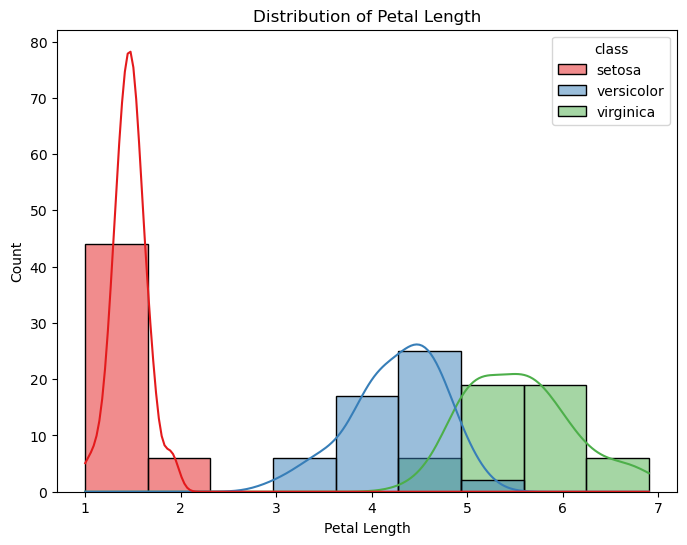

In [73]:
#Lets look at the distribution of the petal_length. Setosa is seperate

# Histogram.
# Create a histogram for petal length separated by class
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='petal_length', hue='class', kde=True, palette='Set1')
plt.title('Distribution of Petal Length')
plt.xlabel('Petal Length')
plt.ylabel('Count')
#plt.legend(title='Class')
plt.legend(classes, title='Class')
plt.show()

In [59]:
# Shapiro test. This result indicates that petal length is far from normally distriguted across all calsses
ss.shapiro(df['petal_length'])

ShapiroResult(statistic=0.8764244318008423, pvalue=7.545183366985952e-10)

<Axes: >

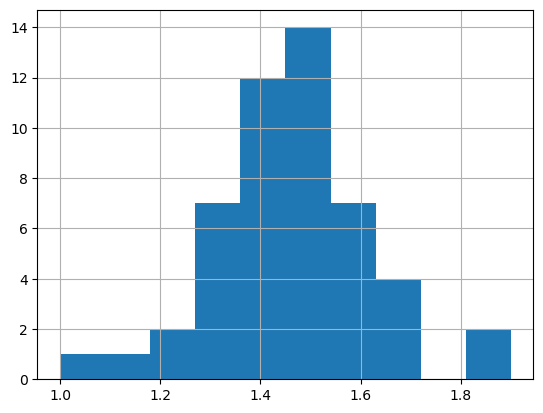

In [74]:
# Separate out gentoos. Lets look at distribution of setosa in isolation
df_seto = df[df['class'] == 'setosa']

# Histogram.
df_seto['petal_length'].hist()


In [72]:
# Shapiro test. 
#The p-value indicates the strength of evidence that the data is 
#normally distributed. With a pvalue >0.05, we can say the 'petal_length' data for 'setosa' 
#may not significantly deviate from a normal distribution.
#So it looks like within the setosa class, petal_length is likley to be normally distributed.
#The data for all classes together combined however is not likley to be normally distributed.

ss.shapiro(df_seto['petal_length'])

ShapiroResult(statistic=0.9549456834793091, pvalue=0.054648224264383316)

## Scaling Data

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

https://stackoverflow.com/questions/55073423/should-i-normalize-or-standardize-my-dataset-for-knn

https://stackoverflow.com/questions/55601928/apply-multiple-standardscalers-to-individual-groups

***

### Conclusions

conclusions